# Fitting Models Exercise 1

## Imports

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [38]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [3]:
np.random.normal?

In [39]:
xdata=np.linspace(-5,5,30)
dy=2
sigma=np.random.normal(0,dy,30)
ydata=a_true*xdata**2+b_true*xdata+c_true+sigma

In [ ]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [52]:
def model(x,a,b,c):
    y=a*x**2+b*x+c
    return y
def deviation(theta,x,y,dy):
    a=theta[0]
    b=theta[1]
    c=theta[2]
    return (y-a*x**2-b*x-c)/dy

In [48]:
xdata,ydata,sigma

(array([-5.        , -4.65517241, -4.31034483, -3.96551724, -3.62068966,
        -3.27586207, -2.93103448, -2.5862069 , -2.24137931, -1.89655172,
        -1.55172414, -1.20689655, -0.86206897, -0.51724138, -0.17241379,
         0.17241379,  0.51724138,  0.86206897,  1.20689655,  1.55172414,
         1.89655172,  2.24137931,  2.5862069 ,  2.93103448,  3.27586207,
         3.62068966,  3.96551724,  4.31034483,  4.65517241,  5.        ]),
 array([ -2.14336593,  -1.31178469,  -0.79132589,  -6.77189696,
         -4.52277629,  -4.68647524,  -6.22112988,  -6.02823842,
         -3.5746268 ,  -7.70511673,  -6.91553005,  -3.65052848,
         -3.21869809,  -3.97090019,  -4.54031875,  -2.42029369,
         -4.44080753,  -1.86658074,   0.48509948,  -1.72095123,
          2.41718169,   4.73774042,   6.09712795,   4.15597987,
          8.87575675,  12.00999813,   9.95256261,  11.60798692,
         19.91751348,  16.75319222]),
 array([-0.64336593,  1.16324503,  2.5398275 , -2.70352597,  0.16390623,
 

In [49]:
opt.leastsq?

In [50]:
model_best,error_best=opt.curve_fit(model,xdata,ydata,dy)

TypeError: model() missing 2 required positional arguments: 'b' and 'c'

In [62]:
best_fit=opt.leastsq(deviation,np.array((1,2,-5)), args=(xdata, ydata, dy), full_output=True)
theta_best=best_fit[0]
theta_cov=best_fit[1]
print('a=',theta_best[0],'+/-',np.sqrt(theta_cov[0,0]))
print('b=',theta_best[1],'+/-',np.sqrt(theta_cov[1,1]))
print('c=',theta_best[2],'+/-',np.sqrt(theta_cov[2,2]))

a= 0.483498332995 +/- 0.0459058220552
b= 1.98811368567 +/- 0.122342723697
c= -3.62339891607 +/- 0.548231733411


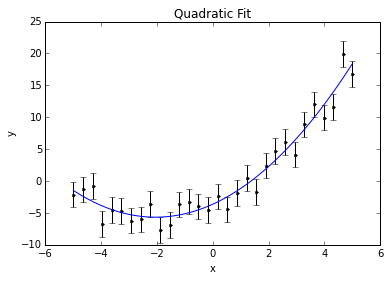

In [60]:
plt.errorbar(xdata,ydata,dy,fmt='k.')
xfit=np.linspace(-5,5,100)
yfit=theta_best[0]*xfit**2+theta_best[1]*xfit+theta_best[2]
plt.plot(xfit,yfit)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Quadratic Fit')

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors